In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import acquire
import prepare

In [65]:
from sklearn.tree import export_text

# Decision Tree



## Exercises

### Using the titanic data, in your classification-exercises repository, create a notebook, decision_tree.ipynb where you will do the following:

In [4]:
df = acquire.get_titanic_data()

Found CSV


In [5]:
df.head(1)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.25,S,Third,NaN,Southampton,0


In [7]:
df = prepare.prep_titanic(df)

In [9]:
df.head(1)

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
0,0,0,3,male,1,0,7.25,S,0,1,0,1


In [16]:
train, validate, test = prepare.split_function(df, 'survived')

In [17]:
print(f'Train: {train.shape}')
print(f'Validate: {validate.shape}')
print(f'Test: {test.shape}')

Train: (534, 12)
Validate: (178, 12)
Test: (179, 12)


In [18]:
train.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
455,455,1,3,male,0,0,7.8958,C,1,1,0,0
380,380,1,1,female,0,0,227.5250,C,1,0,0,0
492,492,0,1,male,0,0,30.5000,S,1,1,0,1
55,55,1,1,male,0,0,35.5000,S,1,1,0,1
243,243,0,3,male,0,0,7.1250,S,1,1,0,1


#### 1. What is your baseline prediction?  
####    What is your baseline accuracy?  
####    remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [19]:
train.survived.value_counts()

0    329
1    205
Name: survived, dtype: int64

*Survived*  
0 == no  
1 == yes  
**Baseline prediction is that the passenger did not survive**

In [21]:
baseline_accuracy = 329 / (329+205)
baseline_accuracy

0.6161048689138576

In [23]:
print(f'Baseline Accuracy: {baseline_accuracy:.02%}')



Baseline Accuracy: 61.61%


#### Split into features and target variable

In [44]:
train.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
455,455,1,3,male,0,0,7.8958,C,1,1,0,0
380,380,1,1,female,0,0,227.5250,C,1,0,0,0
492,492,0,1,male,0,0,30.5000,S,1,1,0,1
55,55,1,1,male,0,0,35.5000,S,1,1,0,1
243,243,0,3,male,0,0,7.1250,S,1,1,0,1


In [41]:
X_train = train[train.columns[2:12]].drop(columns=['sex','embarked'])
X_train.head()

,pclass,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
455,3,0,0,7.8958,1,1,0,0
380,1,0,0,227.5250,1,0,0,0
492,1,0,0,30.5000,1,1,0,1
55,1,0,0,35.5000,1,1,0,1
243,3,0,0,7.1250,1,1,0,1


In [45]:
X_validate = validate[validate.columns[2:12]].drop(columns=['sex','embarked'])
X_test = test[test.columns[2:12]].drop(columns=['sex','embarked'])

In [42]:
# set target
target = 'survived'

In [47]:
# y_targetvariable for train, validate, test below

In [43]:
y_train = train[target]
y_train.head()

455    1
380    1
492    0
55     1
243    0
Name: survived, dtype: int64

In [46]:
y_validate = validate[target]
y_test = test[target]

#### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

### 1st Model

In [48]:
# make the object
clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [49]:
# fit the object
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [50]:
# transform the object
clf.score(X_train, y_train)

0.9456928838951311

In [141]:
clf.score(X_validate, y_validate)

0.7415730337078652

**This model predicted passenger survival ~95% of the time**

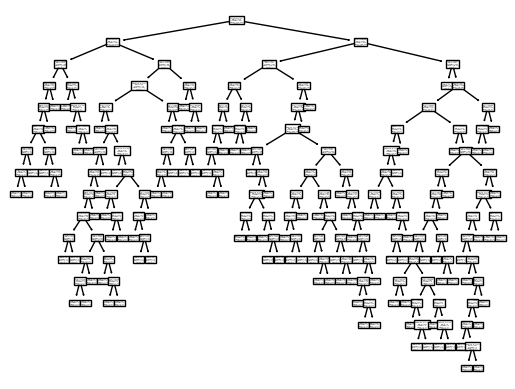

In [57]:
plot_tree(clf,
          feature_names = X_train.columns,
          class_names = clf.classes_.astype(str)
         )
plt.show()

In [56]:
print(clf.classes_.astype(str))

['0' '1']


Takeaway: Based on the visual of the tree, my model is likely overfitting the training data. 

### 2nd model

In [59]:
clf2 = DecisionTreeClassifier(max_depth=4)
clf2

DecisionTreeClassifier(max_depth=4)

In [60]:
clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [61]:
clf2.score(X_train, y_train)

0.8202247191011236

In [142]:
clf2.score(X_validate, y_validate)

0.7921348314606742

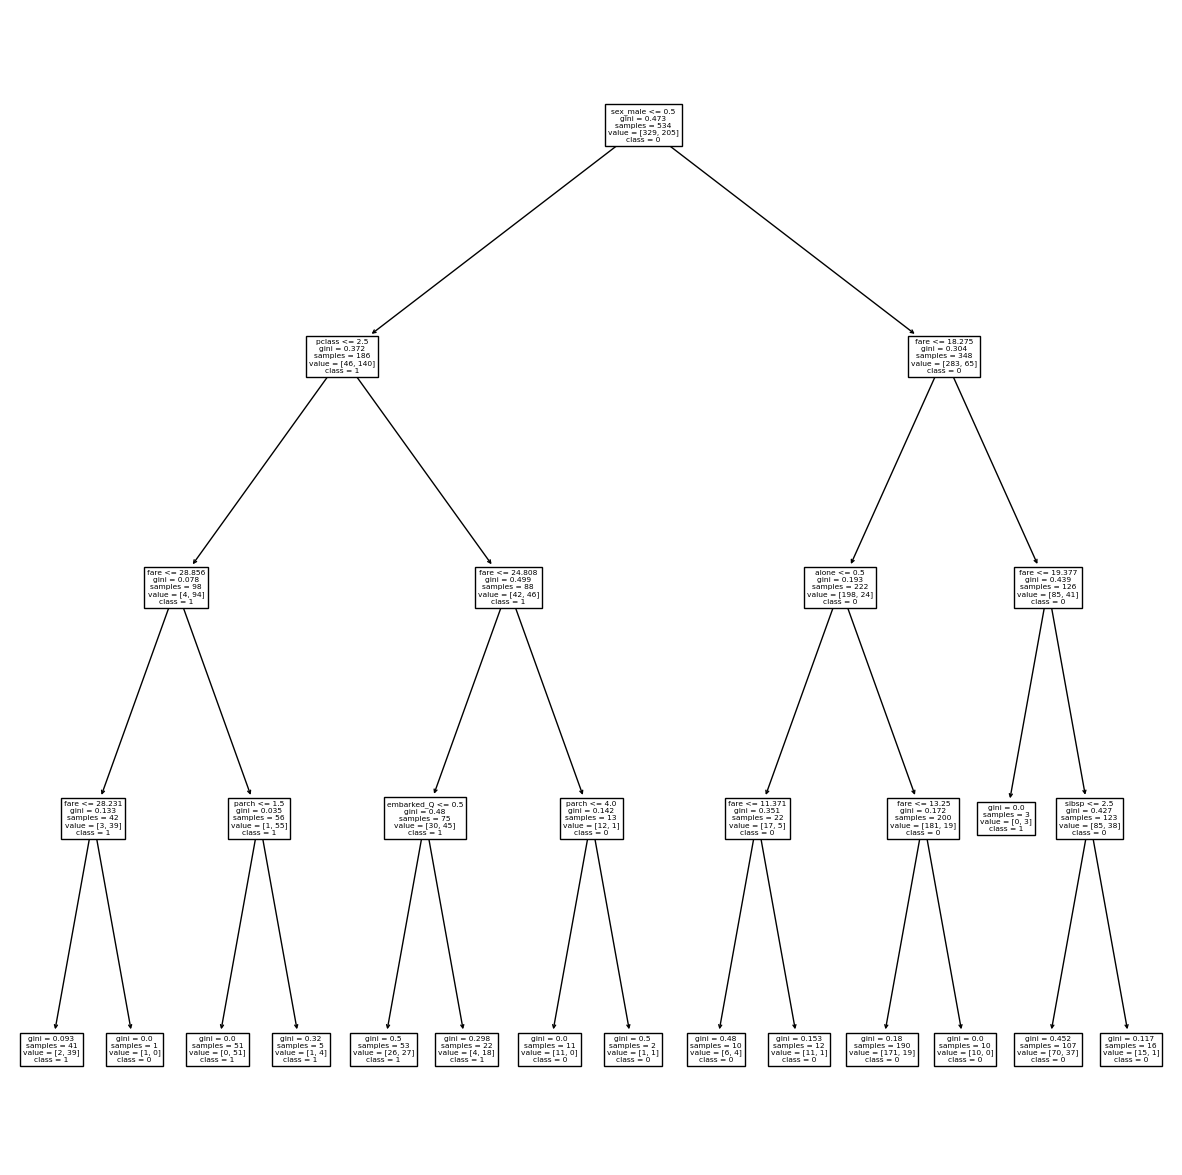

In [69]:
plt.figure(figsize=(15,15))
plot_tree(clf2,
          feature_names=X_train.columns,
          class_names=clf2.classes_.astype(str)
         )
plt.show()

In [70]:
clf2.feature_importances_

array([0.14474256, 0.01830599, 0.00991818, 0.16091467, 0.00568276,
       0.63614939, 0.02428644, 0.        ])

In [72]:
for importance, name in sorted(zip(clf2.feature_importances_, X_train.columns),reverse=True):
    print (name, importance)

sex_male 0.636149392523038
fare 0.16091467261975775
pclass 0.14474256418933093
embarked_Q 0.02428644299003276
sibsp 0.018305994607079525
parch 0.009918176627939805
alone 0.005682756442821233
embarked_S 0.0


### 3rd Model

In [74]:
X_train.head()

,pclass,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
455,3,0,0,7.8958,1,1,0,0
380,1,0,0,227.5250,1,0,0,0
492,1,0,0,30.5000,1,1,0,1
55,1,0,0,35.5000,1,1,0,1
243,3,0,0,7.1250,1,1,0,1


In [94]:
features = ['sex_male', 'fare', 'pclass']
features

['sex_male', 'fare', 'pclass']

In [95]:
X_train[features].head()

,sex_male,fare,pclass
455,1,7.8958,3
380,0,227.5250,1
492,1,30.5000,1
55,1,35.5000,1
243,1,7.1250,3


In [121]:
clf3 = DecisionTreeClassifier(max_depth=4)
clf3

DecisionTreeClassifier(max_depth=4)

In [122]:
clf3.fit(X_train[features], y_train)

DecisionTreeClassifier(max_depth=4)

In [123]:
clf3.score(X_train[features], y_train)

0.8202247191011236

In [140]:
clf3.score(X_validate[features], y_validate)

0.7921348314606742

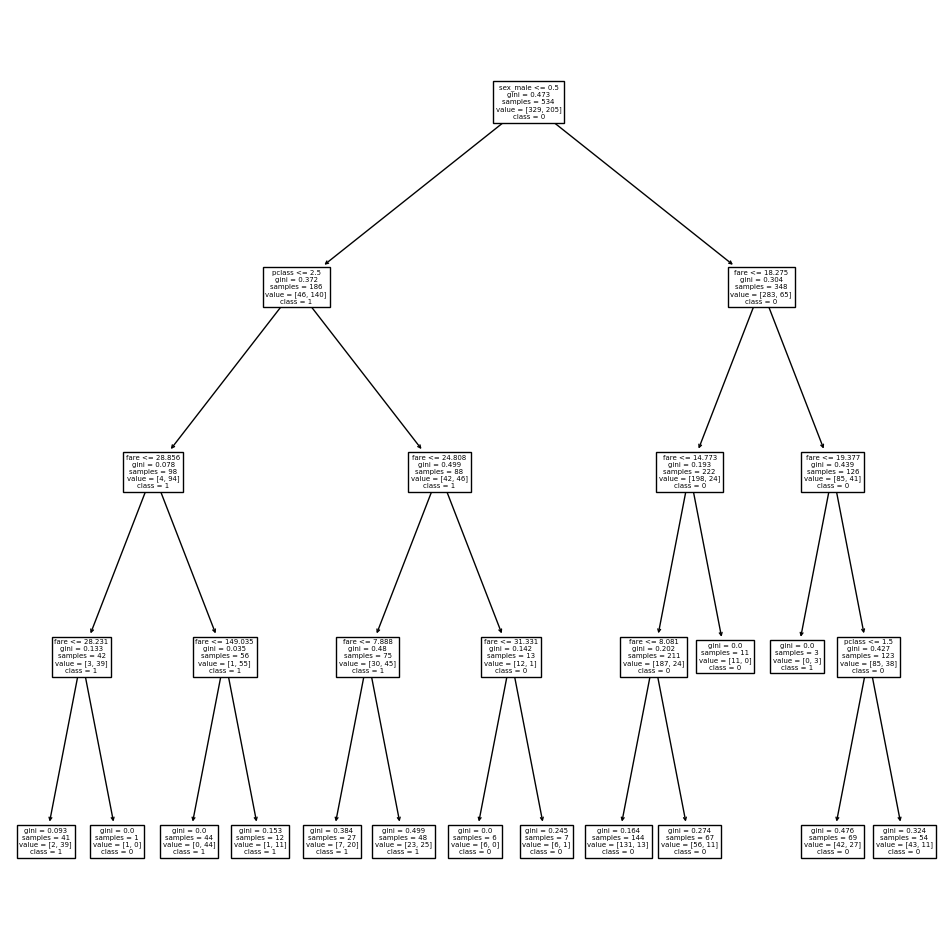

In [104]:
plt.figure(figsize=(12,12))
plot_tree(clf3,
          feature_names=X_train[features].columns,
          class_names=clf3.classes_.astype(str)
         )
plt.show()

#### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [126]:
clf3.predict(X_train[features])[:5]

array([0, 1, 0, 0, 0])

In [127]:
clf3.predict_proba(X_train[features])[:5]

array([[0.90972222, 0.09027778],
       [0.08333333, 0.91666667],
       [0.60869565, 0.39130435],
       [0.60869565, 0.39130435],
       [0.90972222, 0.09027778]])

In [128]:
y_pred = clf3.predict(X_train[features])

In [129]:
confusion_matrix(y_train, y_pred)

array([[296,  33],
       [ 63, 142]])

In [136]:
labels = sorted(y_train.unique())
labels

[0, 1]

In [163]:
pd.DataFrame(confusion_matrix(y_train, y_pred),
             index=[str(label) + '_actual' for label in labels],
             columns=[str(label) + '_predict' for label in labels])

,0_predict,1_predict
0_actual,296,33
1_actual,63,142


In [165]:
confusion_matrix(y_train, y_pred).ravel()

array([296,  33,  63, 142])

In [139]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       329
           1       0.81      0.69      0.75       205

    accuracy                           0.82       534
   macro avg       0.82      0.80      0.80       534
weighted avg       0.82      0.82      0.82       534



#### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



#### 5. Run through steps 2-4 using a different max_depth value.



#### 6. Which model performs better on your in-sample data?



In [ ]:
# first model performs better on sample data because it overfits

#### 7. Which model performs best on your out-of-sample data, the validate set?



In [ ]:
# model 3 runs best of out-of-sample data

# Work through these same exercises using the Telco dataset.

In [193]:
df2 = acquire.get_telco_data()

Found CSV


In [194]:
df2.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [195]:
df2 = prepare.prep_telco(df2)

In [196]:
df2.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,0,1,0,1,0,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,1,0,0,0,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,0,1,1,0,0,1,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,1,1,1,0,0,1,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,0,1,1,0,0,1,0,0,0,1


In [197]:
train2, validate2, test2 = prepare.split_function(df2, 'churn')

In [198]:
print(f'Train: {train2.shape}')
print(f'Validate: {validate2.shape}')
print(f'Test: {test2.shape}')

Train: (4225, 48)
Validate: (1409, 48)
Test: (1409, 48)


In [199]:
train2.churn_Yes.value_counts()

0    3104
1    1121
Name: churn_Yes, dtype: int64

In [200]:
baseline_accuracy = 3104 / (3104+1121)
baseline_accuracy

0.7346745562130178

In [201]:
for col in train2.columns:
    if train2[col].dtype == 'O':
        train2 = train2.drop(col, axis=1)


In [207]:
train2 = train2.drop(columns='churn_Yes')

In [208]:
X_train = train2
X_train.head()

,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,...,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5911,0,26,39.95,1023.75,1,0,1,0,1,0,...,0,0,1,1,0,0,0,0,0,0
2479,0,47,26.90,1250.85,0,1,0,1,0,1,...,1,0,0,1,0,0,1,0,1,0
5889,0,1,50.45,50.45,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
6087,0,69,60.05,4176.70,1,0,0,0,1,0,...,0,1,1,0,1,0,0,0,0,0
785,0,51,87.55,4475.90,0,0,0,1,0,0,...,0,1,0,1,0,1,0,1,0,0


In [202]:
for col in validate2.columns:
    if validate2[col].dtype == 'O':
        validate2 = validate2.drop(col, axis=1)


In [209]:
validate2 = validate2.drop(columns='churn_Yes')

In [210]:
X_validate = validate2

In [203]:
for col in test2.columns:
    if test2[col].dtype == 'O':
        test2 = test2.drop(col, axis=1)


In [211]:
test2 = test2.drop(columns='churn_Yes')

In [212]:
X_test = test2

In [213]:
tree = DecisionTreeClassifier()
tree

DecisionTreeClassifier()

In [214]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [215]:
tree.score(X_train, y_train)

0.9981065088757396

In [216]:
tree.score(X_validate, y_validate)

0.7295954577714692

In [204]:
target = 'churn_Yes'

In [205]:
y_train = train2[target]
y_train.head()

5911    0
2479    0
5889    1
6087    0
785     0
Name: churn_Yes, dtype: uint8

In [206]:
y_validate = validate2[target]
y_test = test2[target]

In [218]:
y_pred = tree.predict(X_train)

In [220]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3104
           1       1.00      0.99      1.00      1121

    accuracy                           1.00      4225
   macro avg       1.00      1.00      1.00      4225
weighted avg       1.00      1.00      1.00      4225



In [221]:
pd.DataFrame(confusion_matrix(y_train, y_pred),
             index=[str(label) + '_actual' for label in labels],
             columns=[str(label) + '_predict' for label in labels])

,0_predict,1_predict
0_actual,3103,1
1_actual,7,1114
